In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)



# Taking Excel file into a DataFrame

In [3]:
df_transactions = pd.read_excel("Raw.xlsx" , sheet_name='Transactions')
df_NewCustomerList = pd.read_excel("Raw.xlsx" , sheet_name='NewCustomerList')
df_CustomerDemographic = pd.read_excel("Raw.xlsx" , sheet_name='CustomerDemographic')
df_CustomerAddress = pd.read_excel("Raw.xlsx" , sheet_name='CustomerAddress')

## 1. Analysis of Transactions Data

In [4]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.00000,Approved,Solex,Standard,medium,medium,71.49000,53.62000,41245.00000
1,2,3,3120,2017-05-21,1.00000,Approved,Trek Bicycles,Standard,medium,large,2091.47000,388.92000,41701.00000
2,3,37,402,2017-10-16,0.00000,Approved,OHM Cycles,Standard,low,medium,1793.43000,248.82000,36361.00000
3,4,88,3135,2017-08-31,0.00000,Approved,Norco Bicycles,Standard,medium,medium,1198.46000,381.10000,36145.00000
4,5,78,787,2017-10-01,1.00000,Approved,Giant Bicycles,Standard,medium,large,1765.30000,709.48000,42226.00000


### 1.1 Finding Empty Values

In [5]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### 1.2 Check for Duplicate Entries

In [6]:
dups = df_transactions.duplicated()
df_transactions[dups].sum()

transaction_id            0.00000
product_id                0.00000
customer_id               0.00000
transaction_date          0.00000
online_order              0.00000
order_status              0.00000
brand                     0.00000
product_line              0.00000
product_class             0.00000
product_size              0.00000
list_price                0.00000
standard_cost             0.00000
product_first_sold_date   0.00000
dtype: float64

### 1.3 Check for Redundant Values in Column

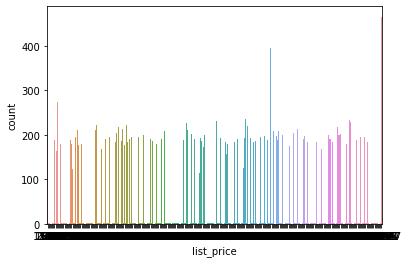

In [7]:
sns.countplot(x="list_price", data=df_transactions)

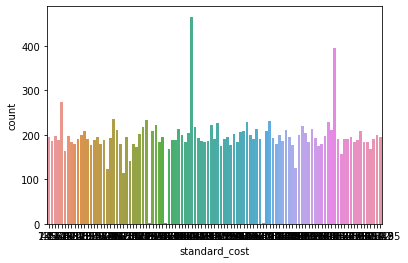

In [8]:
sns.countplot(x="standard_cost", data=df_transactions)

### 1.4 Suggesting Changes to the Columns to remove any empty columns

In [9]:
df_transactions_fixed = df_transactions
df_transactions_fixed['online_order'] =df_transactions_fixed.online_order.fillna(df_transactions_fixed.online_order.mean())  #All Unknowns gets filled with 0.5
df_transactions_fixed['brand'] =df_transactions_fixed.brand.fillna('Unknown')  #All Unknowns gets filled with unkniwn
df_transactions_fixed['product_line'] =df_transactions_fixed.product_line.fillna('Normal')  #All Unknowns gets filled with normal
df_transactions_fixed['product_class'] =df_transactions_fixed.product_class.fillna('Unknown_Class')  #All Unknowns gets filled with Unknown_Class
df_transactions_fixed['product_size'] =df_transactions_fixed.product_size.fillna('Unknown_Size')  #All Unknowns gets filled with Unknown_Size
df_transactions_fixed['standard_cost'] =df_transactions_fixed['standard_cost'].fillna(df_transactions_fixed['standard_cost'].mean())  #Fill with mean cost
df_transactions_fixed = df_transactions_fixed.drop('product_first_sold_date', axis = 1) #Or ask how data was collected 
df_transactions_fixed.isnull().sum()


transaction_id      0
product_id          0
customer_id         0
transaction_date    0
online_order        0
order_status        0
brand               0
product_line        0
product_class       0
product_size        0
list_price          0
standard_cost       0
dtype: int64

## 2. Analysis of Customer Demographic Data

In [10]:
df_CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.00000
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.00000
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.00000
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.00000
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.00000


### 2.1 Finding Empty Values


In [11]:
df_CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### 2.2  Check for Duplicate Entries

In [12]:
dups = df_CustomerDemographic.duplicated()
df_CustomerDemographic[dups].sum()

customer_id                           0.00000
first_name                            0.00000
last_name                             0.00000
gender                                0.00000
past_3_years_bike_related_purchases   0.00000
DOB                                   0.00000
job_title                             0.00000
job_industry_category                 0.00000
wealth_segment                        0.00000
deceased_indicator                    0.00000
default                               0.00000
owns_car                              0.00000
tenure                                0.00000
dtype: float64

### 2.3 Check for Redundant Values in Column

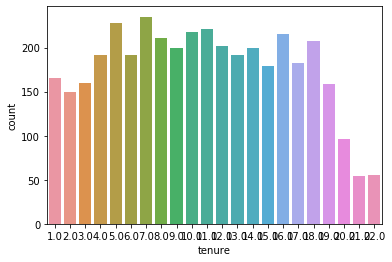

In [14]:
sns.countplot(x="tenure", data=df_CustomerDemographic)

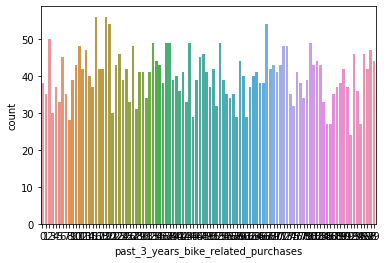

In [15]:
sns.countplot(x="past_3_years_bike_related_purchases", data=df_CustomerDemographic)

### 2.4 Suggesting Changes to the Columns to remove any empty columns

In [18]:
df_CustomerDemographic_fixed = df_CustomerDemographic
from datetime import datetime 

df_CustomerDemographic_fixed = df_CustomerDemographic_fixed.drop('default', axis = 1)
df_CustomerDemographic_fixed['tenure'] =df_CustomerDemographic_fixed.tenure.fillna(df_CustomerDemographic_fixed.tenure.mean())  #All Unknowns gets filled with 0.5
df_CustomerDemographic_fixed['job_title'] =df_CustomerDemographic_fixed.job_title.fillna('Others')  
df_CustomerDemographic_fixed['job_industry_category'] =df_CustomerDemographic_fixed.job_industry_category.fillna('Not Applicable')  
df_CustomerDemographic_fixed['tenure'] =df_CustomerDemographic_fixed.tenure.fillna(df_CustomerDemographic_fixed.tenure.mean()) 
df_CustomerDemographic_fixed['DOB'] = pd.to_datetime(df_CustomerDemographic_fixed['DOB'], errors='coerce', format = '%y%m%d')
now = datetime.now()
df_CustomerDemographic_fixed['DOB'] =df_CustomerDemographic_fixed.DOB.fillna(now)
df_CustomerDemographic_fixed['age'] = now - df_CustomerDemographic_fixed['DOB']
df_CustomerDemographic_fixed['age'] = df_CustomerDemographic_fixed['age'].map(lambda x: str(x)[:-21])
df_CustomerDemographic_fixed['age'] = (df_CustomerDemographic_fixed['age']).astype(int)
df_CustomerDemographic_fixed['age'] = (df_CustomerDemographic_fixed['age'])%365

In [19]:
b = []
for i in df_CustomerDemographic_fixed['age']:
    if i > 120:
        b.append(i)
        
len(b)

2638

In [20]:
final_age=[]
for row in df_CustomerDemographic_fixed['age']:
    if row > 120:
        final_age.append(np.nan)
    else :
        final_age.append(row)
df_CustomerDemographic_fixed['age'] = final_age
df_CustomerDemographic_fixed['age'] =df_CustomerDemographic_fixed.age.fillna(df_CustomerDemographic_fixed.age.mean())  #All Unknowns gets filled with 0.5


In [21]:
c = []
for i in df_CustomerDemographic_fixed['age']:
    if i > 120:
        c.append(i)
        
len(c)

0

In [22]:
df_CustomerDemographic_fixed['gender'] = df_CustomerDemographic_fixed['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
df_CustomerDemographic_fixed['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [23]:
df_CustomerDemographic_fixed['last_name'] =df_CustomerDemographic_fixed.last_name.fillna('last_name')  #All Unknowns gets filled with 0.5
df_CustomerDemographic_fixed['age'] =df_CustomerDemographic_fixed.age.fillna(df_CustomerDemographic_fixed.age.mean())  #All Unknowns gets filled with 0.5
df_CustomerDemographic_fixed = df_CustomerDemographic_fixed.drop('DOB', axis = 1)
df_CustomerDemographic_fixed.isnull().sum()



customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64

## 3. Analysis of Customer Customer Addresses Data

In [24]:
df_CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### 3.1 Finding Empty Values

In [25]:
df_CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

### 3.2 Check for duplicate entries

In [26]:
dups = df_CustomerAddress.duplicated()
df_CustomerAddress[dups].sum()

customer_id          0.00000
address              0.00000
postcode             0.00000
state                0.00000
country              0.00000
property_valuation   0.00000
dtype: float64

### 3.3 Suggesting Changes to the Columns to remove any empty columns

In [27]:
df_CustomerAddress_fixed = df_CustomerAddress

## 4. Analysis of New Customer List Data

In [28]:
df_NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.53000,0.66250,0.82813,0.70391,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.72000,0.72000,0.90000,0.76500,1,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.60000,0.60000,0.60000,0.60000,1,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.08000,1.35000,1.35000,1.35000,4,4,1.70312
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.45000,0.45000,0.56250,0.56250,4,4,1.70312


### 4.1 Finding Empty Values

In [29]:
df_NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

### 4.3 Suggesting Changes to the Columns to remove any empty columns

In [30]:
df_NewCustomerList_fixed = df_NewCustomerList
df_NewCustomerList_fixed = df_NewCustomerList_fixed.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis = 1)
df_NewCustomerList_fixed['job_title'] =df_NewCustomerList_fixed.job_title.fillna('Others')  #All Unknowns gets filled with 0.5
df_NewCustomerList_fixed['job_industry_category'] =df_NewCustomerList_fixed.job_industry_category.fillna('Not Applicable')

df_NewCustomerList_fixed['DOB'] = pd.to_datetime(df_NewCustomerList_fixed['DOB'], errors='coerce', format = '%y%m%d')
now = datetime.now()
df_NewCustomerList_fixed['DOB'] =df_NewCustomerList_fixed.DOB.fillna(now)
df_NewCustomerList_fixed['age'] = now - df_NewCustomerList_fixed['DOB']
df_NewCustomerList_fixed['age'] = df_NewCustomerList_fixed['age'].map(lambda x: str(x)[:-21])
df_NewCustomerList_fixed = df_NewCustomerList_fixed[df_NewCustomerList_fixed.age.apply(lambda x: x.isnumeric())]
df_NewCustomerList_fixed['age'] = (df_NewCustomerList_fixed['age']).astype(int)
df_NewCustomerList_fixed['age'] = (df_NewCustomerList_fixed['age'])%365
df_NewCustomerList_fixed = df_NewCustomerList_fixed.drop(['DOB'], axis = 1)

final_age_1=[]
for row in df_NewCustomerList_fixed['age']:
    if row > 120:
        final_age_1.append(np.nan)
    else :
        final_age_1.append(row)
df_NewCustomerList_fixed['age'] = final_age_1

df_NewCustomerList_fixed['age'] =df_NewCustomerList_fixed.age.fillna(df_NewCustomerList_fixed.age.mean())  


df_NewCustomerList_fixed['last_name'] =df_NewCustomerList_fixed.last_name.fillna('last_name')  

df_NewCustomerList_fixed['gender'] = df_NewCustomerList_fixed['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
df_NewCustomerList_fixed['gender'].value_counts()


Female    513
Male      470
Name: gender, dtype: int64

In [31]:
df_NewCustomerList_fixed.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

# 5. MERGING 

In [32]:
#Final Datasets

df_transactions_fixed
df_NewCustomerList_fixed
df_CustomerDemographic_fixed
df_CustomerAddress_fixed

print('\n')
print(df_NewCustomerList_fixed.columns)
print('\n')
print(df_CustomerDemographic_fixed.columns)
print('\n')
print(df_CustomerAddress_fixed.columns)



Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')


Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')


In [33]:
df_NewCustomerList_fixed.insert(0, 'customer_id', range(4001, 4001 + len(df_NewCustomerList_fixed)))

In [34]:
df_customer_demographic_Addresss = pd.merge(df_CustomerDemographic_fixed, df_CustomerAddress_fixed, how='left', on='customer_id')


In [35]:
print('\n')
print(df_NewCustomerList_fixed.columns)
print(df_NewCustomerList_fixed.shape)

print('\n')
print(df_customer_demographic_Addresss.columns)
print(df_customer_demographic_Addresss.shape)




Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')
(983, 19)


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')
(4000, 17)


In [36]:
merged = pd.concat([df_NewCustomerList_fixed, df_customer_demographic_Addresss], ignore_index=True, sort=False)
merged.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,4001,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14.00000,45 Shopko Center,4500.00000,QLD,Australia,6.00000,1.00000,1.71875,64.00338
1,4002,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16.00000,14 Mccormick Park,2113.00000,NSW,Australia,11.00000,1.00000,1.71875,94.00000
2,4003,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10.00000,5 Colorado Crossing,3505.00000,VIC,Australia,5.00000,1.00000,1.71875,64.00338
3,4004,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5.00000,207 Annamark Plaza,4814.00000,QLD,Australia,1.00000,4.00000,1.70312,64.00338
4,4005,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19.00000,115 Montana Place,2093.00000,NSW,Australia,9.00000,4.00000,1.70312,64.00338


In [37]:
print(df_transactions_fixed.columns)
print(df_transactions_fixed.shape)

print(merged.columns)
print(merged.shape)


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost'],
      dtype='object')
(20000, 12)
Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')
(4983, 19)


In [38]:
with pd.ExcelWriter('FIXED.xlsx') as writer:  
    df_transactions_fixed.to_excel(writer, sheet_name='transactions')
    merged.to_excel(writer, sheet_name='Customer_info')